In [1]:
import sys
sys.path.append("/Volumes/GoogleDrive/My Drive/github projects/questaal-reader")
# from questaal_reader import get_bands
from pymatgen.electronic_structure.plotter import BSPlotter as bp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.lines import Line2D
# from adjustText import adjust_text
import re
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage
from tabulate import tabulate
from scipy.interpolate import Rbf

In [8]:
def get_eigvec_qpts(nc,nv,nk,eig_fname,qpts_fname="QBZ"):
    '''
    returns wave function in format [nth eig,kpt,nv,nc]
    '''
    t=0
    eigenvecs=[]
    def extract_nums(text):
        numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
        rx = re.compile(numeric_const_pattern, re.VERBOSE)
        num=[float(i) for i in rx.findall(text)]
        try:
            return num[0]+1j*num[1]
        except:None
    tmp=[]
    with open(eig_fname) as topo_file:
        for line in topo_file:
            if "val" not in line:
                eigenvecs.append(extract_nums(line))
    def extract_nums(text):
        numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
        rx = re.compile(numeric_const_pattern, re.VERBOSE)
        num=[float(i) for i in rx.findall(text.replace('D','e'))]
        try:
            return num
        except:None
    kpts=[]
    with open(qpts_fname) as topo_file:
        for line in topo_file:
            kpts.append(extract_nums(line))
    kpts=np.array(kpts[1:]).T
    n=int(len(eigenvecs)/(nk*nk*nk*nv*nc))
    wav=np.zeros((n,nk*nk*nk,nv,nc))*1j
    cnt=0
    for ni in range(n):
        for j in range(nv):
            for k in range(nc):
                for i in range(nk*nk*nk):
                    wav[ni][i][nv-j-1][nc-k-1]=eigenvecs[cnt]
                    cnt+=1
    return wav,kpts


In [6]:
nc=5;nv=5;nk=6
wav,kpts=get_eigvec_qpts(nc=nc,nv=nv,nk=nk,eig_fname="data/BSE_data/Eigenvecs_bse",qpts_fname="data/BSE_data/QBZ")

In [7]:
wav=wave.reshape
nc=4;nv=7
n=wav.shape[0]
fig,ax=plt.subplots(n,1,facecolor="w",figsize=(7,3*n))
x=np.arange(1,nc+1)
y=np.arange(1,nv+1)
X,Y=np.meshgrid(x,y)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#fff1d0","#dd1c1a"])
for i in ax:
    for j in range(1,nc+1):
        i.axvline(j,c="k",ls="-",zorder=-3,alpha=0.1)
    for j in range(1,nv+1):
        i.axhline(j,c="k",ls="-",zorder=-3,alpha=0.1)
    i.set_ylim(0,4)
    i.set_xlim(0,9)
    i.set_xticks(range(1,nc+1))
    i.set_yticks(range(1,nv+1))
    i.set_ylabel("Cond. band num.")
    i.set_xlabel("Val. band num.")
    
for i in range(n):
    W1=np.sum(np.real(np.multiply(wav[i],np.conjugate(wav[i]))),axis=0)
    ax[i].set_title("$|\Psi_{"+str(i+1)+"}^{ex}(v,c)|^2$")
    ax[i].scatter(X,Y,c=W1,cmap=cmap,s=W1*500*10)
plt.tight_layout()

NameError: name 'wave' is not defined

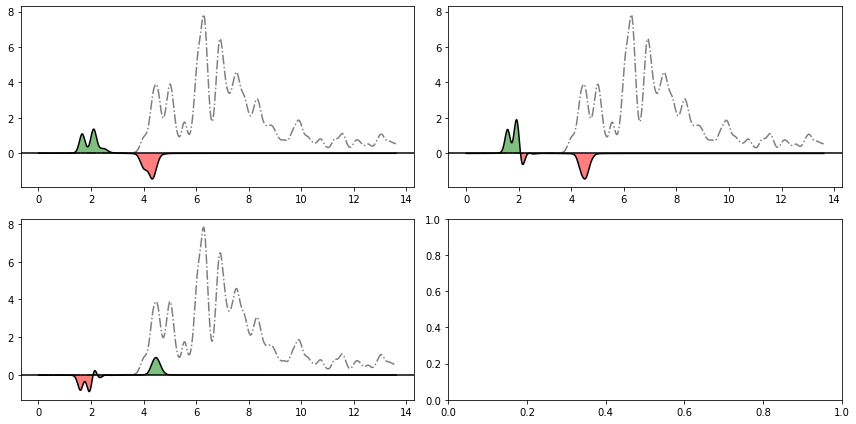

In [3]:

def plot_data(x,y,ax):
    ax.plot(x,y,c="k")
    ax.fill_between(x, y, 0, where=y >= 0,
                    facecolor='green', interpolate=True,alpha=0.5)
    ax.fill_between(x, y, 0, where=y <= 0,
                    facecolor='red', interpolate=True,alpha=0.5)
    ax.axhline(0,c="k",ls="-")

def do_band1(ax):
    bse=get_spectrum("data/BSE_data/BSE_val_1_cond_1",smear=.01)
    rpa=get_spectrum("data/RPA_withlocal_z",smear=.01)
    y=bse.y-rpa.y
    plot_data(bse.x,y,ax)
    ax.plot(rpa.x,rpa.y,c="k",ls="-.",alpha=0.5)

def plot_val_cond(val1=1,val2=2,cond1=1,cond2=2,ax=None):
    bse_1=get_spectrum(f"data/BSE_data/BSE_val_{val1}_cond_{cond1}",smear=.01)
    bse_2=get_spectrum(f"data/BSE_data/BSE_val_{val2}_cond_{cond2}",smear=.01)
    plot_data(bse_1.x,bse_2.y-bse_1.y,ax)
    rpa=get_spectrum("data/RPA_withlocal_z",smear=.01)
    ax.plot(rpa.x,rpa.y,c="k",ls="-.",alpha=0.5)

fig,ax1=plt.subplots(2,2,figsize=(12,6))
ax=ax1[0][0]
do_band1(ax)

ax=ax1[0][1]
plot_val_cond(val1=1,val2=1,cond1=1,cond2=2,ax=ax)

ax=ax1[1][0]
plot_val_cond(val1=2,val2=1,cond1=1,cond2=1,ax=ax)

# ax=ax1[1][1]
# plot_val_cond(val1=2,val2=1,cond1=1,cond2=1,ax=ax)

plt.tight_layout()


[2, 1] [2, 1]


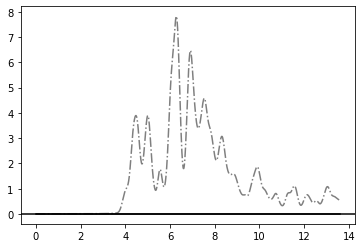

In [14]:
def plot_val_cond(bands=[1,2],ax=None):
    plot_bands=[]
    # for i in bands:
    #     d=i
    #     if i>1:
    #         d=i-1
    #     plot_bands.append(d)
    if bands[1]!=1:
        plot_bands=[bands[0],bands[1]-1]
    else:
        plot_bands=[bands[0],bands[1]]
    bse_1=get_spectrum(f"data/BSE_data/BSE_val_{bands[0]}_cond_{bands[1]}",smear=.01)
    bse_2=get_spectrum(f"data/BSE_data/BSE_val_{plot_bands[0]}_cond_{plot_bands[1]}",smear=.01)
    print(bands,plot_bands)
    plot_data(bse_1.x,bse_1.y-bse_2.y,ax)
    rpa=get_spectrum("data/RPA_withlocal_z",smear=.01)
    ax.plot(rpa.x,rpa.y,c="k",ls="-.",alpha=0.5)
fig,ax=plt.subplots()
plot_val_cond(bands=[2,1],ax=ax)

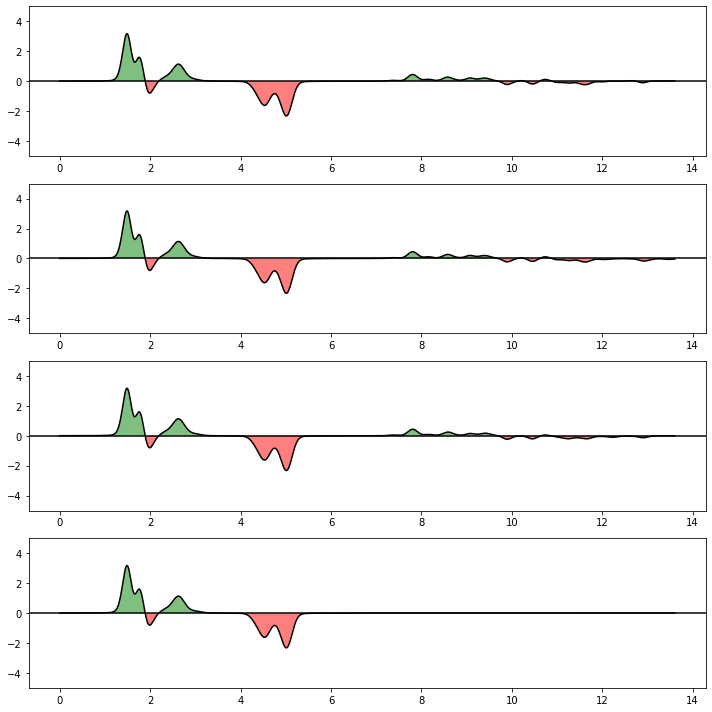

In [11]:
bse_1=get_spectrum(f"data/BSE_data/BSE_val_{1}_cond_{5}",smear=.1)
bse_2=get_spectrum(f"data/BSE_data/BSE_val_{2}_cond_{5}",smear=.1)
fig,ax1=plt.subplots(4,1,figsize=(10,10))
ax=ax1[0]
plot_data(bse_1.x,bse_2.y-bse_1.y,ax)


bse_1=get_spectrum(f"data/BSE_data/BSE_val_{1}_cond_{4}",smear=.1)
bse_2=get_spectrum(f"data/BSE_data/BSE_val_{2}_cond_{4}",smear=.1)
ax=ax1[1]
plot_data(bse_1.x,bse_2.y-bse_1.y,ax)

bse_1=get_spectrum(f"data/BSE_data/BSE_val_{1}_cond_{3}",smear=.1)
bse_2=get_spectrum(f"data/BSE_data/BSE_val_{2}_cond_{3}",smear=.1)
ax=ax1[2]
plot_data(bse_1.x,bse_2.y-bse_1.y,ax)


bse_1=get_spectrum(f"data/BSE_data/BSE_val_{1}_cond_{2}",smear=.1)
bse_2=get_spectrum(f"data/BSE_data/BSE_val_{2}_cond_{2}",smear=.1)
ax=ax1[3]
plot_data(bse_1.x,bse_2.y-bse_1.y,ax)

for i in ax1:i.set_ylim(-5,5)
plt.tight_layout()
# plt.plot(bse_1.x,bse_1.y)
# plt.plot(bse_1.x,bse_2.y,c="k")

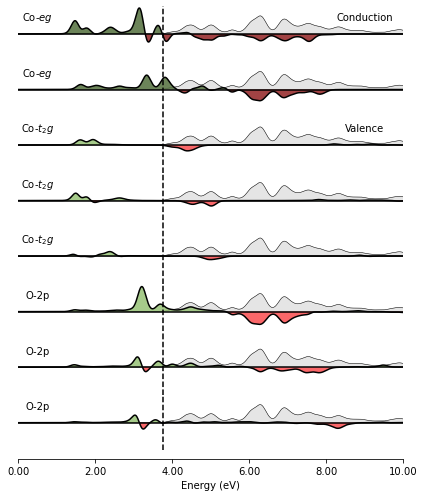

In [4]:

fig,ax1=plt.subplots(8,1,figsize=(6,7),sharex=True,gridspec_kw={'hspace':0},facecolor="w")
from pymatgen.core.spectrum import Spectrum
def get_spectrum(fname="data/BSE_data/BSE_val_1_cond_1",smear=.01):
    E=np.loadtxt(fname,comments="#").T
    data=Spectrum(E[0],E[2])
    # data.normalize(mode='max', value=1)
    data.smear(.1)
    return data
def plot_data(x,y,ax,hatch=False):
    ax.plot(x,y,c="k")
    if hatch==False:
        ax.fill_between(x, y, 0, where=y >= 0,
                        facecolor='#90be6d', interpolate=True,alpha=0.8)
        ax.fill_between(x, y, 0, where=y <= 0,
                        facecolor='#f94144', interpolate=True,alpha=0.8)
    else:
        ax.fill_between(x, y, 0, where=y >= 0,
                    facecolor='#90be6d', interpolate=True,alpha=0.8,hatch="......")
        ax.fill_between(x, y, 0, where=y <= 0,
                            facecolor='#f94144', interpolate=True,alpha=0.8,hatch="......")
    ax.axhline(0,c="k",ls="-")


def clean(ax,xtick=True):
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.set_xticks([])
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_xticks([], minor=True)

def add_x(ax1):
    ax2 = ax1[-1].twiny()
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")
    ax2.spines["bottom"].set_position(("axes", -0.15))
    ax2.set_frame_on(True)
    ax2.patch.set_visible(False)
    for sp in ax2.spines.values():
        sp.set_visible(False)
    ax2.spines["bottom"].set_visible(True)
    ax2.set_xticks(np.linspace(0,10,6))
    ax2.set_xticklabels([f"{i:.2f}" for i in np.linspace(0,10,6)])
    ax2.set_xlabel(r"Energy (eV)")

def plot_top(n,ax):
    bse_1=get_spectrum(f"data/BSE_data/BSE_val_{5}_cond_{n}",smear=.1)
    bse_2=get_spectrum(f"data/BSE_data/BSE_val_{5}_cond_{n+1}",smear=.1)
    plot_data(bse_1.x,bse_2.y-bse_1.y,ax,hatch=True)

def plot_bottom(n,ax):
    bse_1=get_spectrum(f"data/BSE_data/BSE_val_{n}_cond_{5}",smear=.1)
    bse_2=get_spectrum(f"data/BSE_data/BSE_val_{n+1}_cond_{5}",smear=.1)
    plot_data(bse_1.x,bse_2.y-bse_1.y,ax)

# ax=ax1[0]
# plot_top(2,ax)
ax=ax1[0]
bg="w"
ax.set_facecolor(bg) 
plot_top(1,ax)


ax=ax1[1]
bse_2=get_spectrum(f"data/BSE_data/BSE_val_{5}_cond_{1}",smear=.1)
bse_1=get_spectrum("data/RPA_withlocal_z",smear=.1)
plot_data(bse_1.x,bse_2.y-bse_1.y,ax,hatch=True)
ax.set_facecolor(bg) 

ax=ax1[2]
bse_2=get_spectrum(f"data/BSE_data/BSE_val_{1}_cond_{5}",smear=.1)
bse_1=get_spectrum("data/RPA_withlocal_z",smear=.1)
plot_data(bse_1.x,bse_2.y-bse_1.y,ax)


for i in [4,5,6,7,8]:
    ax=ax1[i-1]
    plot_bottom(i-3,ax)

labels=["Co-$eg$","Co-$eg$","Co-$t_2g$","Co-$t_2g$","Co-$t_2g$","O-2p","O-2p","O-2p"]

for j,i in enumerate( ax1):
    i.set_ylim(-12,12)
    i.set_xlim(0,10)
    rpa=get_spectrum("data/RPA_withlocal_z",smear=.1)
    i.plot(rpa.x,rpa.y,ls="-",lw=.5,c="k",zorder=-3)
    i.fill_between(rpa.x,rpa.y,ls="-",lw=.5,color="k",zorder=-3,alpha=.1)
    i.axvline(3.762,c="k",ls="--")
    # if i!=ax1[-1]:
    clean(i)
    i.text(0.05, 0.8,labels[j],
     horizontalalignment='center',
     verticalalignment='center',
     transform = i.transAxes)
ax1[0].text(0.9, .8,"Conduction",
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax1[0].transAxes)
ax1[2].text(0.9, .8,"Valence",
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax1[2].transAxes)

add_x(ax1)
plt.tight_layout()
plt.savefig("figs/exciton_contribution.png",dpi=300)
# plt.plot(bse_1.x,bse_1.y)
# plt.plot(bse_1.x,bse_2.y,c="k")

In [11]:
kpts=[]
def extract_nums(text):
    numeric_const_pattern = '[-+]? (?: (?: \d* \. \d+ ) | (?: \d+ \.? ) )(?: [Ee] [+-]? \d+ ) ?'
    rx = re.compile(numeric_const_pattern, re.VERBOSE)
    num=[float(i) for i in rx.findall(text)]
    try:
        return num[0]+1j*num[1]
    except:None
qpts_fname="data/BSE_data/QBZ"
with open(qpts_fname) as topo_file:
    for line in topo_file:
        kpts.append(extract_nums(line))
kpts=np.array(kpts[1:]).T
wave=np.load("data/BSE_data/wave_usable.npy")
# wave=wave.reshape(50,4,7,216)
np.sum(wave[0]*wave[0].conj())

(1.000000000000001+0j)

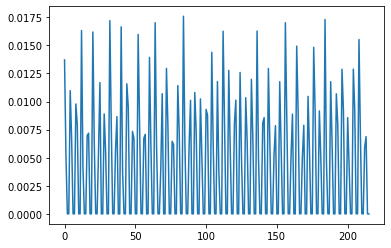

In [33]:
sq = lambda a: np.real(a*a.conj())
a=np.apply_over_axes(np.sum,sq(wave),[2,3])[0].flatten()
plt.plot(a)

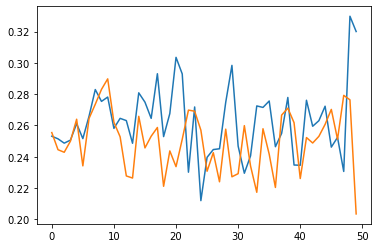

In [68]:
plt.plot(np.einsum("ijkl->li",sq(wave))[0])
plt.plot(np.einsum("ijkl->li",sq(wave))[-1])

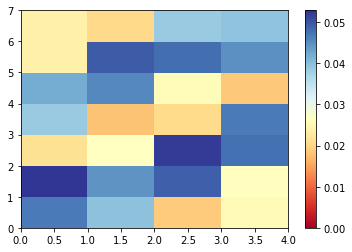

In [12]:
a=wave[3].reshape(-1,7,4)
plt.pcolor(np.sum((a*a.conj()),axis=0).real,cmap="RdYlBu",vmin=0)
plt.colorbar()

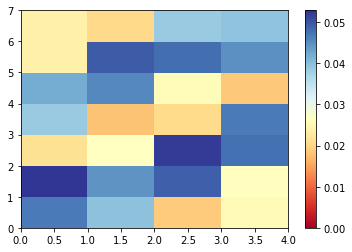

In [73]:
sq = lambda a: np.real(a*a.conj())
plt.pcolor(sq(wave[3].flatten().reshape(-1,7,4)).sum(axis=0),vmin=0,cmap="RdYlBu")
plt.colorbar()

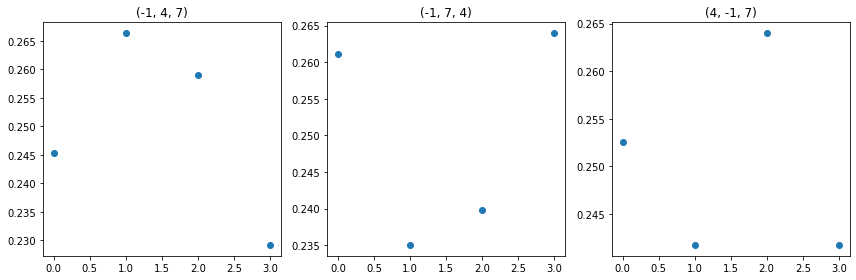

In [156]:
pos_data=[ [(-1,4,7),[0,2]],
      [(7,4,-1),[0,2]],
      [(-1,7,4),[0,1]],
      [(7,-1,4),[0,1]],
      [(4,-1,7),[1,2]],
      [(4,7,-1),[1,2]],
]
fig,ax1=plt.subplots(1,3,figsize=(12,4))
n=4
for j,pos in enumerate( pos_data[::2]):
    vals=np.apply_over_axes(np.sum, sq(wave[n].reshape(pos[0])), pos[1])
    ax1[j].scatter(range(4),vals)
    ax1[j].set_title(str(pos[0]))
plt.tight_layout()

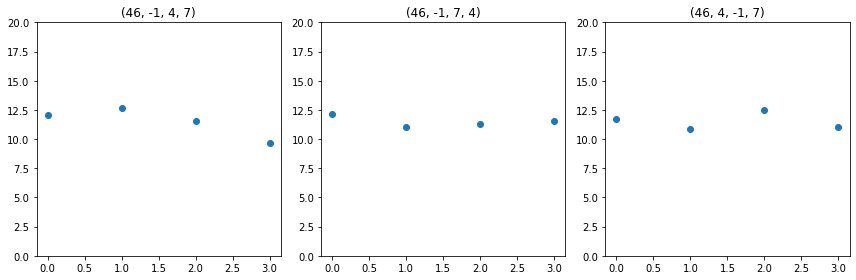

In [183]:
n=90
d=4
pos_data=[ [(wave[d:n].shape[0],-1,4,7),[0,0+1,2+1]],
      [(wave[d:n].shape[0],7,4,-1),[0,0+1,2+1]],
      [(wave[d:n].shape[0],-1,7,4),[0,0+1,1+1]],
      [(wave[d:n].shape[0],7,-1,4),[0,0+1,1+1]],
      [(wave[d:n].shape[0],4,-1,7),[0,1+1,2+1]],
      [(wave[d:n].shape[0],4,7,-1),[0,1+1,2+1]],
]
fig,ax1=plt.subplots(1,3,figsize=(12,4))
for j,pos in enumerate( pos_data[::2]):
    vals=np.apply_over_axes(np.sum, sq(wave[d:n].reshape(pos[0])), pos[1])
    ax1[j].scatter(range(4),vals)
    ax1[j].set_title(str(pos[0]))
    ax1[j].set_ylim(0,20)
plt.tight_layout()

In [ ]:
n=90
d=4
pos_data=[ [(wave[d:n].shape[0],-1,4,7),[0,0+1,2+1]],
      [(wave[d:n].shape[0],7,4,-1),[0,0+1,2+1]],
      [(wave[d:n].shape[0],-1,7,4),[0,0+1,1+1]],
      [(wave[d:n].shape[0],7,-1,4),[0,0+1,1+1]],
      [(wave[d:n].shape[0],4,-1,7),[0,1+1,2+1]],
      [(wave[d:n].shape[0],4,7,-1),[0,1+1,2+1]],
]
fig,ax1=plt.subplots(1,3,figsize=(12,4))
for j,pos in enumerate( pos_data[::2]):
    vals=np.apply_over_axes(np.sum, sq(wave[d:n].reshape(pos[0])), pos[1])
    ax1[j].scatter(range(4),vals)
    ax1[j].set_title(str(pos[0]))
    ax1[j].set_ylim(0,20)
plt.tight_layout()